Binary Classification 3

1. Binary classification with multiple predictors
2. Support vector machines

As always let's import our libraries

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn import tree

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


And just like last class, let's focus on the  MPG dataset and see if we can predict whether a car has an origin from the USA or Not USA using mpg as the predictor

In [ ]:
mpg = sns.load_dataset('mpg')

In [ ]:
dummy_origin =  pd.get_dummies(mpg['origin'])
mpg.insert(len(mpg.columns),'usa',dummy_origin['usa'])

In [ ]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,usa
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,1
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,1
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,1
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,1
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,1


As we saw yesterday, mpg by itself seems like a better good predictor for whether the car is USA or not usa

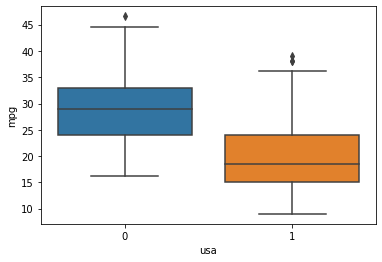

In [ ]:
sns.boxplot(mpg['usa'],mpg['mpg'])

In [ ]:
Xtrain,Xtest,ytrain,ytest = train_test_split(mpg[['mpg']],mpg['usa'],random_state=1)

In [ ]:
logit_model = LogisticRegression(random_state =1)
logit_model = logit_model.fit(Xtrain, ytrain)
print(logit_model.score(Xtrain,ytrain))
print(logit_model.score(Xtest,ytest))

0.7315436241610739
0.8


In [ ]:
tree_model = tree.DecisionTreeClassifier(max_depth=1)
tree_model = tree_model.fit(Xtrain, ytrain)
print(tree_model.score(Xtrain,ytrain))
print(tree_model.score(Xtest,ytest))

0.7651006711409396
0.77


With a single predictor, we do a pretty decent job. >75% is pretty good!

But we aren't always dealing with one predictor and we can probably do even better with multiple predictors!

In [ ]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,usa
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,1
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,1
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,1
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,1
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,1


Let's look at the scatterplot of total_phenols and proline

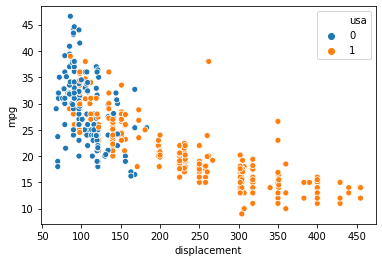

In [ ]:
sns.scatterplot(mpg['displacement'],mpg['mpg'],hue=mpg['usa'])

Using both predictors, we can probably do an even better job of separating groups 0 and 1!

In [ ]:
X = mpg[['displacement','mpg']]

In [ ]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X,mpg['usa'],random_state=1)

And now let's this new data with a logistic regression

In [ ]:
logit_model2 = LogisticRegression()
logit_model2 = logit_model.fit(Xtrain, ytrain)

And let's see the score of the train and test

In [ ]:
print(logit_model.score(Xtrain,ytrain))
print(logit_model.score(Xtest,ytest))

0.8557046979865772
0.88



Just like with linear regression, its hard to see what this fit looks like in logistic regression when there are multiple predictors

Let's take a peek with a tree diagram

In [ ]:
tree_model2 = tree.DecisionTreeClassifier(max_depth=1)
tree_model2.fit(Xtrain, ytrain)
print(tree_model2.score(Xtrain,ytrain))
print(tree_model2.score(Xtest,ytest))

0.8590604026845637
0.9


Try playing around with the max_depth and you will see at what level the decision tree uses both dfeatures.

In [ ]:
tree_model3 = tree.DecisionTreeClassifier(max_depth=3) 
tree_model3.fit(Xtrain, ytrain)
print(tree_model3.score(Xtrain,ytrain))
print(tree_model3.score(Xtest,ytest))

0.9093959731543624
0.84


[Text(386.3076923076923, 570.7800000000001, 'X[0] <= 134.5\ngini = 0.469\nsamples = 298\nvalue = [112, 186]'),
 Text(206.03076923076924, 407.70000000000005, 'X[0] <= 97.5\ngini = 0.355\nsamples = 130\nvalue = [100, 30]'),
 Text(103.01538461538462, 244.62, 'X[1] <= 29.25\ngini = 0.1\nsamples = 57\nvalue = [54, 3]'),
 Text(51.50769230769231, 81.53999999999996, 'gini = 0.198\nsamples = 18\nvalue = [16, 2]'),
 Text(154.52307692307693, 81.53999999999996, 'gini = 0.05\nsamples = 39\nvalue = [38, 1]'),
 Text(309.04615384615386, 244.62, 'X[0] <= 106.0\ngini = 0.466\nsamples = 73\nvalue = [46, 27]'),
 Text(257.53846153846155, 81.53999999999996, 'gini = 0.397\nsamples = 22\nvalue = [6, 16]'),
 Text(360.55384615384617, 81.53999999999996, 'gini = 0.338\nsamples = 51\nvalue = [40, 11]'),
 Text(566.5846153846154, 407.70000000000005, 'X[0] <= 190.5\ngini = 0.133\nsamples = 168\nvalue = [12, 156]'),
 Text(515.0769230769231, 244.62, 'X[0] <= 159.5\ngini = 0.426\nsamples = 39\nvalue = [12, 27]'),
 Text(

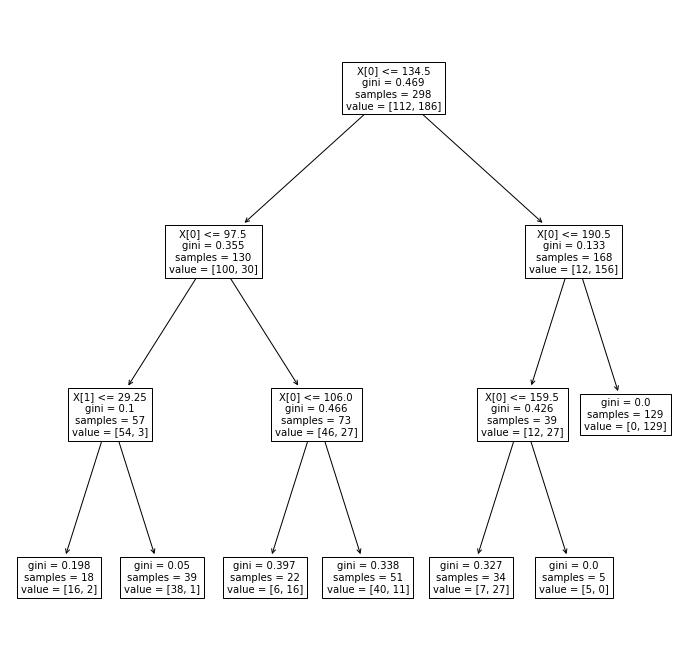

In [ ]:
plt.figure(figsize=[12,12])
tree.plot_tree(tree_model3)

With max_depth 1 or 2, it only considered X[1] (i.e., the second column of data) and basically splits with just that column. Accuracy doesn't change much either

With a max_depth of 3, you can see it using X[0] in some of the branches. And our accuracy is better! Nice!

But there is another really useful method for binary classification

Support vector classification 

https://en.wikipedia.org/wiki/Support_vector_machine#Linear_SVM

And let's import the library

In [ ]:
from sklearn.svm import SVC

Here, we will create an instance of the model with a linear kernal, meaning it will separate the data using just a line

In [ ]:
svc_model = SVC(kernel='linear')
svc_model.fit(Xtrain, ytrain)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Let's check the accuracy of this SVC model.

In [ ]:
print(svc_model.score(Xtrain,ytrain))
print(svc_model.score(Xtest,ytest))

0.8523489932885906
0.88


Pretty good!

We can check the predictions. Again, it returns a 1 or 0 on whether it thinks the data will belong to group 1 or 0

In [ ]:
svc_model.predict(Xtrain)

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1], dtype=u

We can view our support vectors, which are the datapoints on the margin

In [ ]:
svc_model.support_vectors_

And plot them onto our data. This gives us a quick look into how ou data was separate

In [ ]:
Xtrain

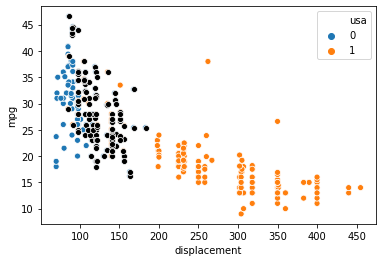

In [ ]:
sns.scatterplot(Xtrain['displacement'], Xtrain['mpg'], hue=ytrain)
sns.scatterplot(svc_model.support_vectors_[:,0],svc_model.support_vectors_[:,1],color='k')

Alterantively, we can plot our margin using the coef_ and intercept_ of the model.

Note: this is specific to linear SVC

In [ ]:
svc_model.coef_

array([[0.03930158, 0.03649028]])

In [ ]:
svc_model.intercept_

array([-6.07851401])

To use the coef_ and intercept, we need to do a few things. First, let's pull out the coefficents, which are basically weights

In [ ]:
w = svc_model.coef_[0]
print(w)

[0.03930158 0.03649028]


Dividing them basically gets us a slope

In [ ]:
slope = -w[0] / w[1] 
print(slope)

-1.077042303084694


Our intercept needs to be adjusted by the weight of the y-axis

In [ ]:
intercept = -svc_model.intercept_[0]/w[1]
print(intercept)

166.57897509328433


Then, using Xtrain as the X in our y = m*x + b equation, we can derive our line

In [ ]:
yy = slope * Xtrain['displacement'] + intercept

Let's put this all on the plot

(0.0, 50.0)

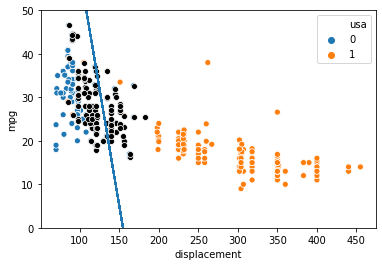

In [ ]:
sns.scatterplot(Xtrain['displacement'], Xtrain['mpg'], hue=ytrain)
plt.plot(Xtrain['displacement'], yy)
sns.scatterplot(svc_model.support_vectors_[:,0],svc_model.support_vectors_[:,1],color='k')
plt.ylim([0,50])

Looks good!

We can do this with the testing data too to get a feel for how well it separated it

(0.0, 50.0)

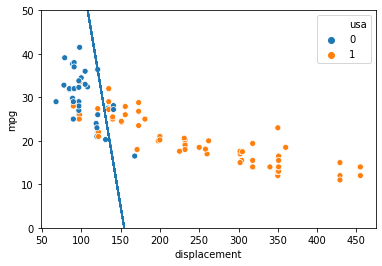

In [ ]:
yy = slope * Xtest['displacement'] + intercept

sns.scatterplot(Xtest['displacement'], Xtest['mpg'], hue=ytest)
plt.plot(Xtest['displacement'], yy)
plt.ylim([0,50])

Here is another method to generate the margin. Its a bit more complex

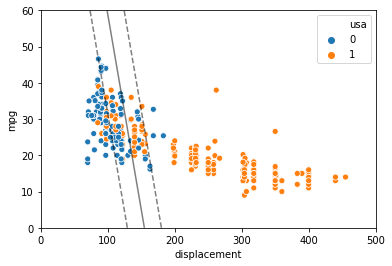

In [ ]:
sns.scatterplot(Xtrain['displacement'], Xtrain['mpg'],hue=ytrain)

# create grid to evaluate model
xx = np.linspace(0, 500, 30)  # works best if you know the xlim[0] and xlim[1]
yy = np.linspace(0,60, 30)  # works best if you know the ylim[0] and ylim[1]
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svc_model.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
plt.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

That's pretty much most of what I wanted to cover of binary classification

There are other types of classification techniques (Random forest, perceptron, k-nearest neighbors) and we could certainly spend a lot more time talking about the naunces of Decision Trees and Support Vector machines.

For now, I think this should give you a basic idea of how to conduct classification, what is happening, and how to evaluate the classification

Next, we will cover what cross-validation is because it concerns how we conduct our machine learning